In [1]:
import numpy                as np
from astropy import units   as units

## matplotlib
from matplotlib.ticker      import AutoMinorLocator
from matplotlib             import rcParams, rc
import matplotlib           as mpl
import matplotlib.pyplot    as plt
import matplotlib.cm        as cm
from matplotlib.colors      import ListedColormap, LinearSegmentedColormap

from os import listdir
from tqdm import tqdm
from datetime import datetime


# Change the matplotlib default parameters
rcParams.update({'font.size':   8})
rcParams.update({'figure.dpi': 120})

outpath = '/STER/silkem/ChemTorch/out/'

def temp(rho, eps):
    """
    Funtion to calculate temperature T in function of density rho, given an exponent epsilon.
    rho = np.array
    eps = float
    """
    T = rho**(eps/2)
    return T

def getdirs(dirname):
    print('>>> Retrieving dirs in "'+dirname+'"')
    dirs = listdir(outpath+dirname+'/')
    dirs.remove('meta.json')
    print('     length:', len(dirs))
    return dirs

In [3]:
name = datetime.now()
alpha = 0.5

dirs_em2 = getdirs('easy-mace2')
# dirs_em3 = getdirs('easy-mace3')
# dirs_em = getdirs('easy-mace')
dirs_new = getdirs('new')

>>> Retrieving dirs in "easy-mace2"
     length: 6626
>>> Retrieving dirs in "new"
     length: 946624


In [3]:
def check_for_NaN(dirname, dirs, cutoff):

    count_nan = 0
    i_list = []

    for i in tqdm(range(0,len(dirs))):
        abs = np.load(outpath+dirname+'/'+dirs[i]+'/abundances.npy')
        abs = np.clip(abs, cutoff, None)
        abs = np.log10(abs)

        if np.any(np.isnan(abs)):
            count_nan +=1
            i_list.append(i)
    
    print('# NaN in '+dirname+': '+str(count_nan)+' / '+str(len(dirs)))
    return count_nan
        

In [50]:
nan_1 = check_for_NaN('easy-mace2', dirs_em, cutoff = 1e-20)

100%|██████████| 6626/6626 [00:17<00:00, 388.30it/s]

# NaN in easy-mace2: 0 / 6626


In [45]:
nan_2 = check_for_NaN('new', dirs_new, cutoff = 1e-20)

  0%|          | 1236/803232 [00:40<7:18:05, 30.51it/s] 


KeyboardInterrupt: 

In [36]:
input  = np.load(outpath+'new/'+success[0]+'/input.npy')
tstep = np.load(outpath+'new/'+success[0]+'/tstep.npy')
abs = np.load(outpath+'new/'+success[0]+'/abundances.npy')
tictoc = np.load(outpath+'new/'+success[0]+'/tictoc.npy')

print(tstep, input)
print('')
# print(abs)
print('')
print(abs[:,0][0])
print(abs[:,1][[0])

[0.00000000e+00 3.51109704e-01 7.02219409e-01 4.21331645e+00
 7.72441349e+00 4.28353839e+01 7.79463543e+01 3.83263310e+02
 6.88580266e+02 9.93897222e+02 1.72484053e+03 2.45578383e+03
 2.89600246e+03] [2.91313207e+06 8.33140685e+02 1.68279144e-06 3.99782140e+00
 2.89600246e+03]


9.151882380704221e-08
9.151882380704221e-08



>> Plotting succesful models...


100%|██████████| 6551/6551 [02:24<00:00, 45.37it/s]



>> Setting figure options...


100%|██████████| 4/4 [00:00<00:00, 6556.16it/s]


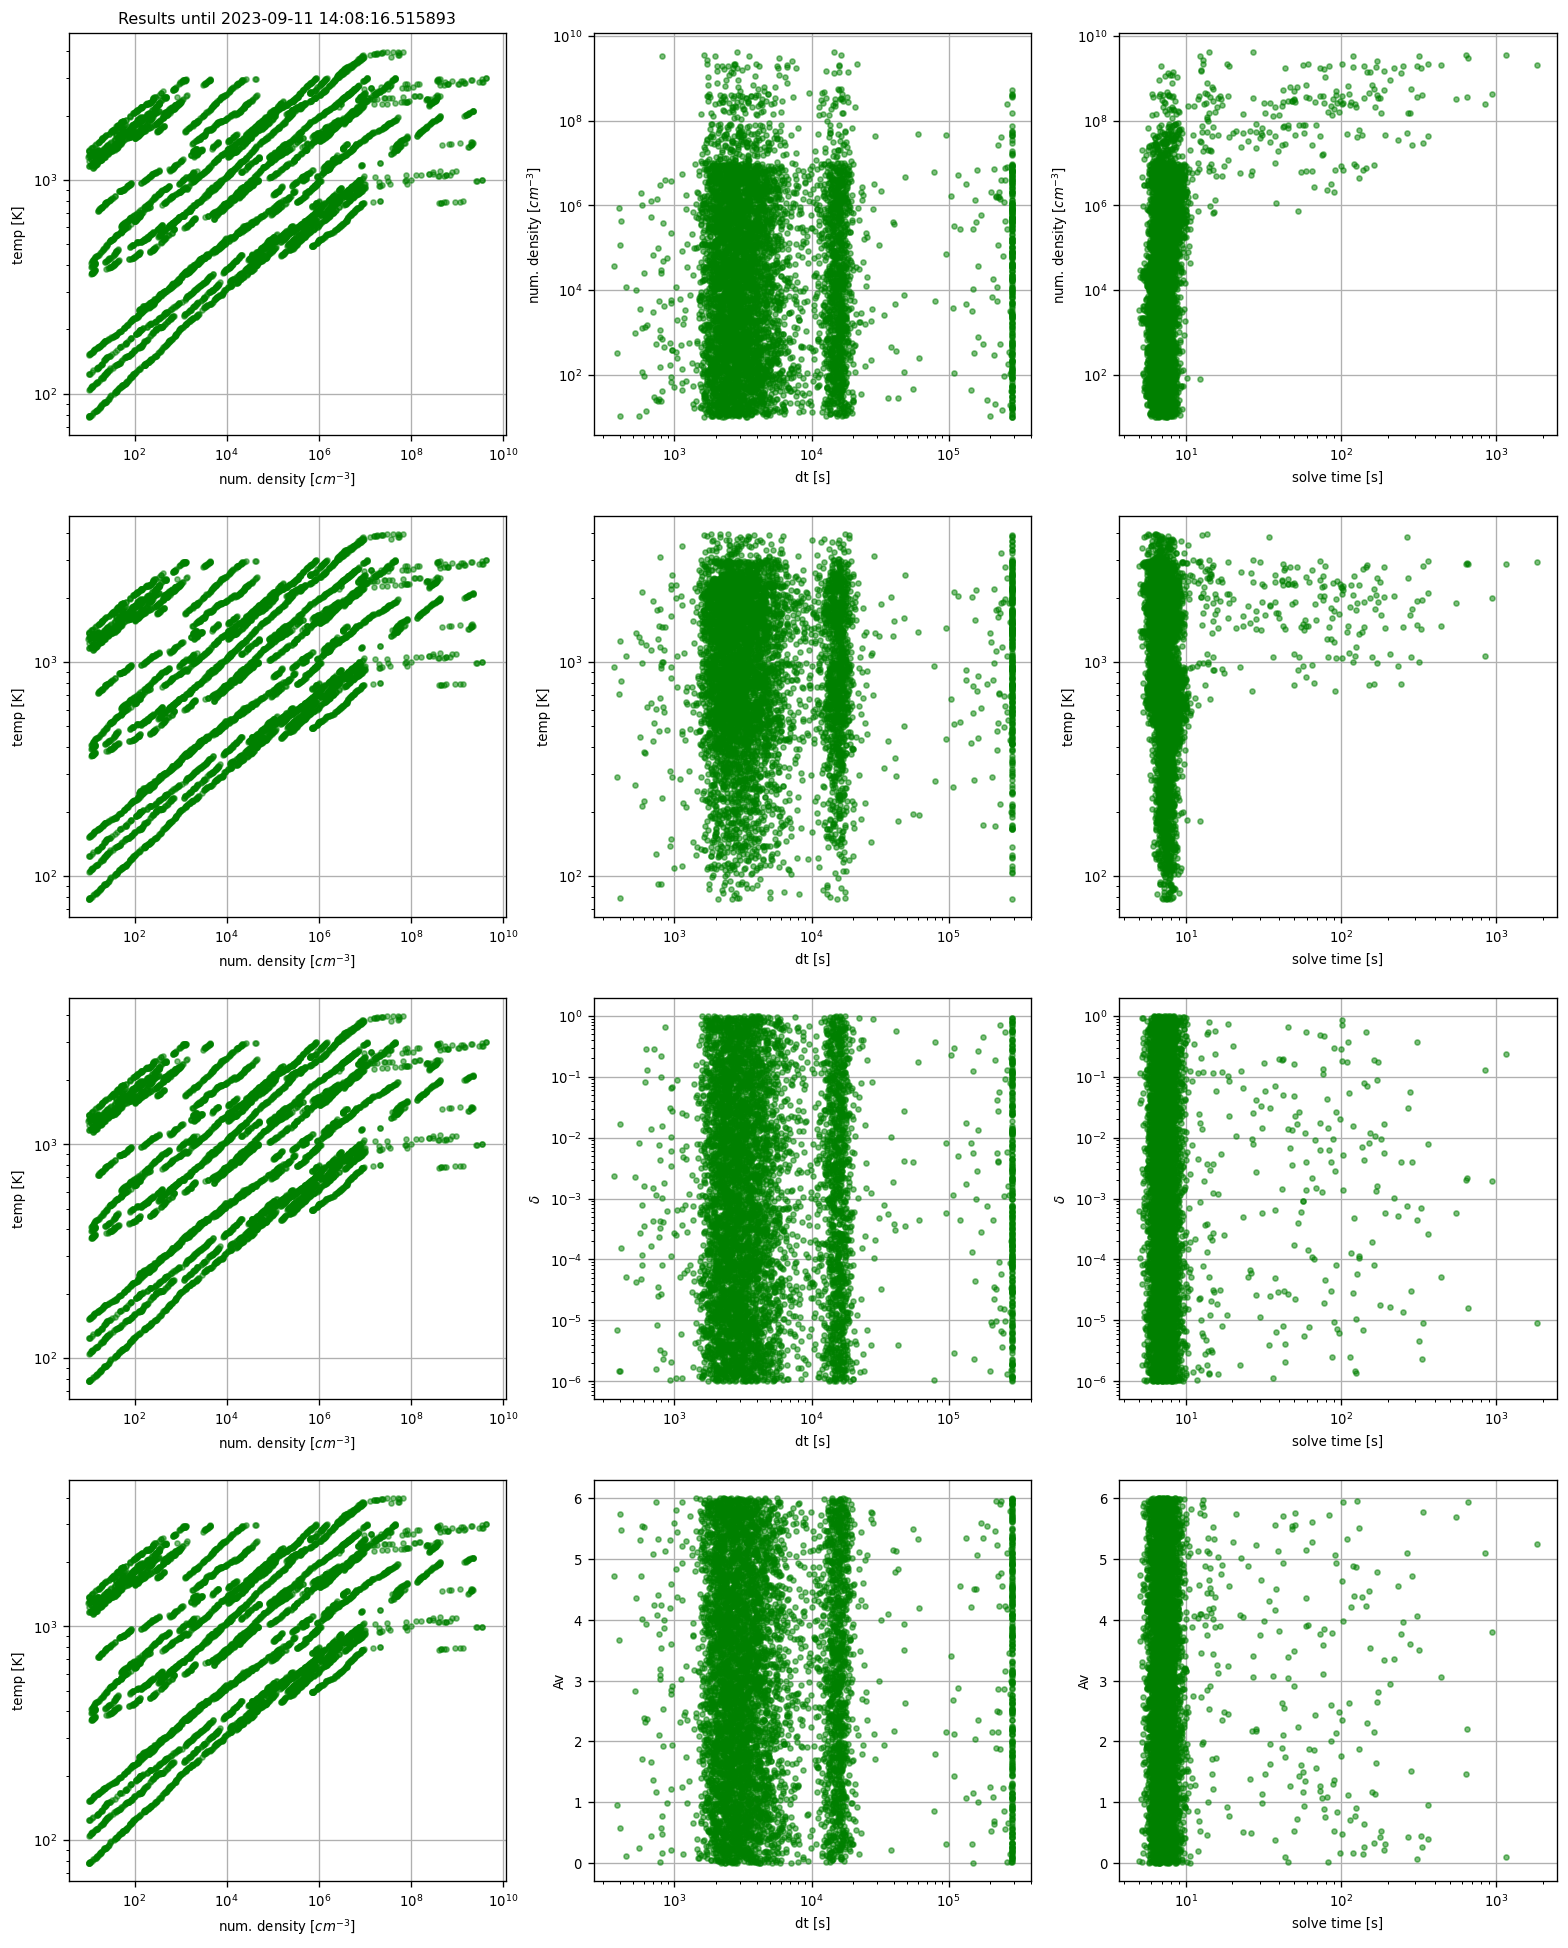

In [51]:
fig, ax = plt.subplots(4,3, figsize=(16, 20))

ax[0,0].set_title('Results until '+str(name))

m_fail = '.'
c_fail = 'firebrick'
alpha = 0.5

dt = 0

m_suc = '.'
c_suc = 'green'

print("\n>> Plotting succesful models...")
for i in tqdm(range(0,len(success),100)):
# for i in tqdm(range(36341, len(success))):
    input  = np.load(outpath+'new/'+success[i]+'/input.npy')
    tictoc = np.load(outpath+'new/'+success[i]+'/tictoc.npy')

    # if i < 6150 and i >= 18734: 
    #     c_suc = 'green'
    # if i >= 6150 and i < 18734:
    #     c_suc = 'royalblue'
    
    ## parameter space
    ax[0,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[1,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[2,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[3,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)

    ## density
    ax[0,1].plot(input[-1],input[0], color = c_suc, marker = m_suc, alpha = alpha)
    ax[0,2].plot(tictoc[0],input[0], color = c_suc, marker = m_suc, alpha = alpha)

    ## temperature
    ax[1,1].plot(input[-1],input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[1,2].plot(tictoc[0],input[1], color = c_suc, marker = m_suc, alpha = alpha)

    ## delta
    ax[2,1].plot(input[-1],input[2], color = c_suc, marker = m_suc, alpha = alpha)
    ax[2,2].plot(tictoc[0],input[2], color = c_suc, marker = m_suc, alpha = alpha)

    ## Av
    ax[3,1].plot(input[-1],input[3], color = c_suc, marker = m_suc, alpha = alpha)
    ax[3,2].plot(tictoc[0],input[3], color = c_suc, marker = m_suc, alpha = alpha)

print('\n>> Setting figure options...')
for i in tqdm(range(len(ax))):
    for j in tqdm(range(len(ax[i]))):
        ax[i,j].set_xscale('log')
        ax[i,j].set_yscale('log')    
        ax[i,j].grid(True)

ax[3,1].set_yscale('linear')
ax[3,2].set_yscale('linear')

for i in tqdm(range(4)):
    ax[i,0].set_xlabel('num. density [$cm^{-3}$]')
    ax[i,0].set_ylabel('temp [K]')
    ax[i,1].set_xlabel('dt [s]')
    ax[i,2].set_xlabel('solve time [s]')


## density
ax[0,1].set_ylabel('num. density [$cm^{-3}$]')
ax[0,2].set_ylabel('num. density [$cm^{-3}$]')

## temperature
ax[1,1].set_ylabel('temp [K]')
ax[1,2].set_ylabel('temp [K]')

## delta
ax[2,1].set_ylabel('$\\delta$')
ax[2,2].set_ylabel('$\\delta$')

## Av
ax[3,1].set_ylabel('Av')
ax[3,2].set_ylabel('Av')

plt.show()
    

In [6]:
## plotting solve time via colormap

def plot(dirname, dirs, step = 100):

    tmax = 25
    time = np.linspace(0, 1, 10000)
    colors = cm.viridis(time)

    # print(colors)
    m_suc = 'o'

    fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [18,1]},figsize=(10, 8))

    ax[0].set_title('Succeeded models '+ str(name))

    # for i in range(16000,16020):
    # for i in tqdm(range(5000,6000)):
    for i in tqdm(range(0,len(dirs), step)):
        input  = np.load(outpath+dirname+'/'+dirs[i]+'/input.npy')
        tictoc = np.load(outpath+dirname+'/'+dirs[i]+'/tictoc.npy')

        target = tictoc[0]
        idx = np.argmin(np.abs(time*tmax - target))
        c = colors[idx]

        # print(target, time[idx]*tmax, idx, c,input[0], input[1])

        ax[0].plot(input[0], input[1], color = c, marker = m_suc, alpha = alpha)



    rho = np.linspace(1e1, 1e10, 100)
    eps = np.linspace(0.4,1,7)

    # fig, ax = plt.subplots(1,1, figsize=(6, 8))
    for i in range(len(eps)):
        T = temp(rho, eps[i])
        # ax[0].plot(rho, T, label = 'eps = '+str(np.round(eps[i],1)))
        
        
    ## Colorbar
    cmap = cm.viridis
    norm =  mpl.colors.Normalize(vmin=min(time*tmax), vmax=max(time*tmax))
    cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax[1], orientation='vertical', label = 'solver time [s]', extend = 'both')

    ax[0].set_xscale('log')
    ax[0].set_yscale('log')    
    ax[0].grid(True)
    ax[0].set_xlabel('num. density [$cm^{-3}$]')
    ax[0].set_ylabel('temp [K]')
    # ax[0].set_ylim([1e1,4e3])
    # ax[0].set_xlim([1e1, 1e10])

    ax[0].legend()

    plt.show()

    return

  0%|          | 0/947 [00:00<?, ?it/s]

100%|██████████| 947/947 [00:56<00:00, 16.85it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


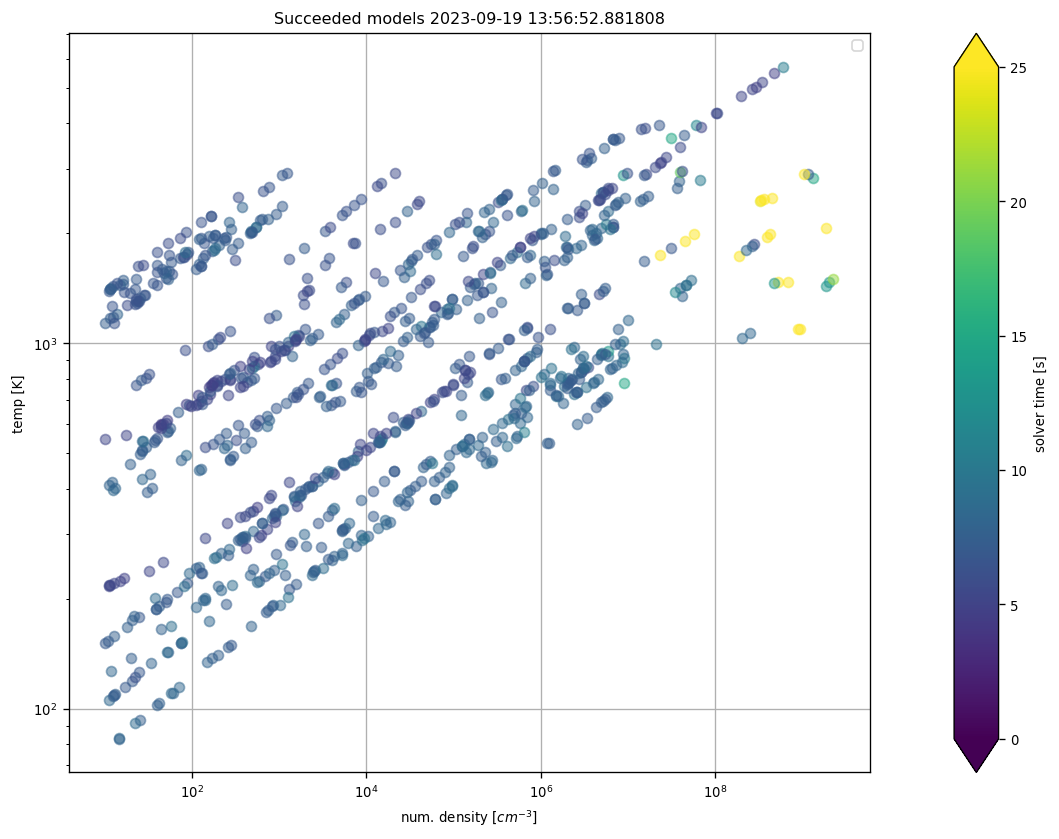

In [7]:
plot('new', dirs_new, step = 1000)

100%|██████████| 6626/6626 [00:42<00:00, 156.34it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


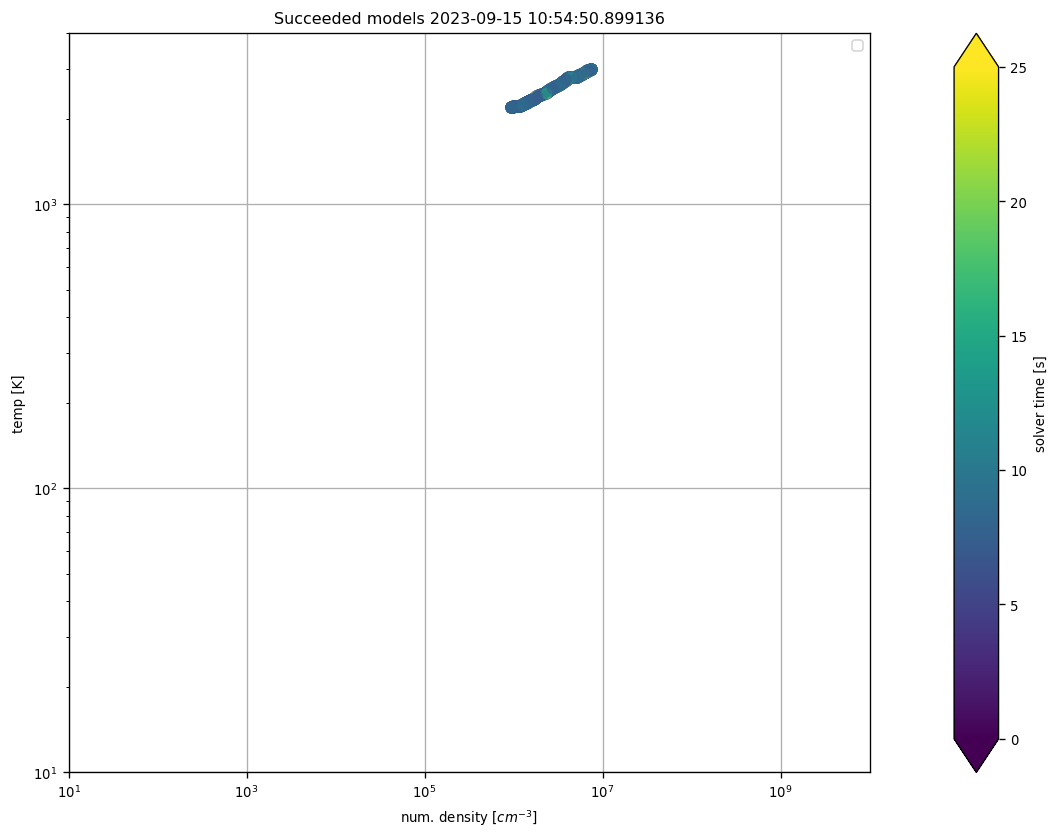

In [14]:
plot('easy-mace2', dirs_em2, step = 1)

  0%|          | 0/296 [00:00<?, ?it/s]

100%|██████████| 296/296 [01:23<00:00,  3.54it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


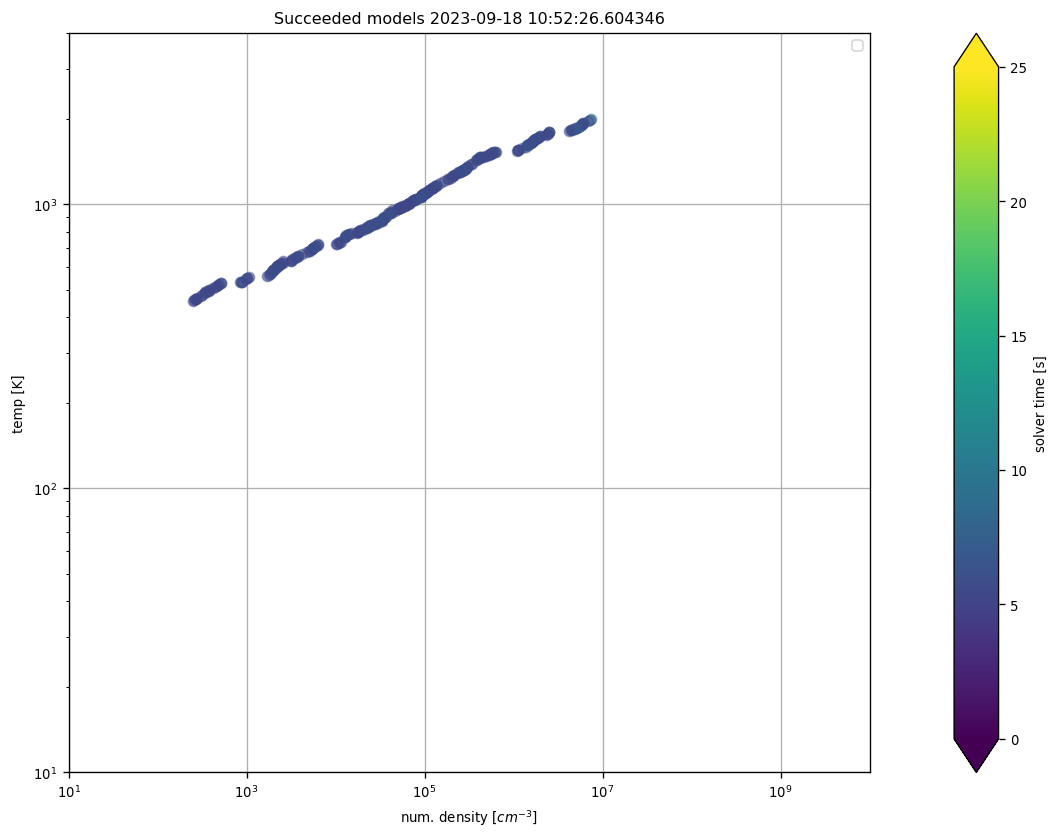

In [6]:
plot('easy-mace3', dirs_em3, step = 100)

100%|██████████| 9074/9074 [04:19<00:00, 35.02it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


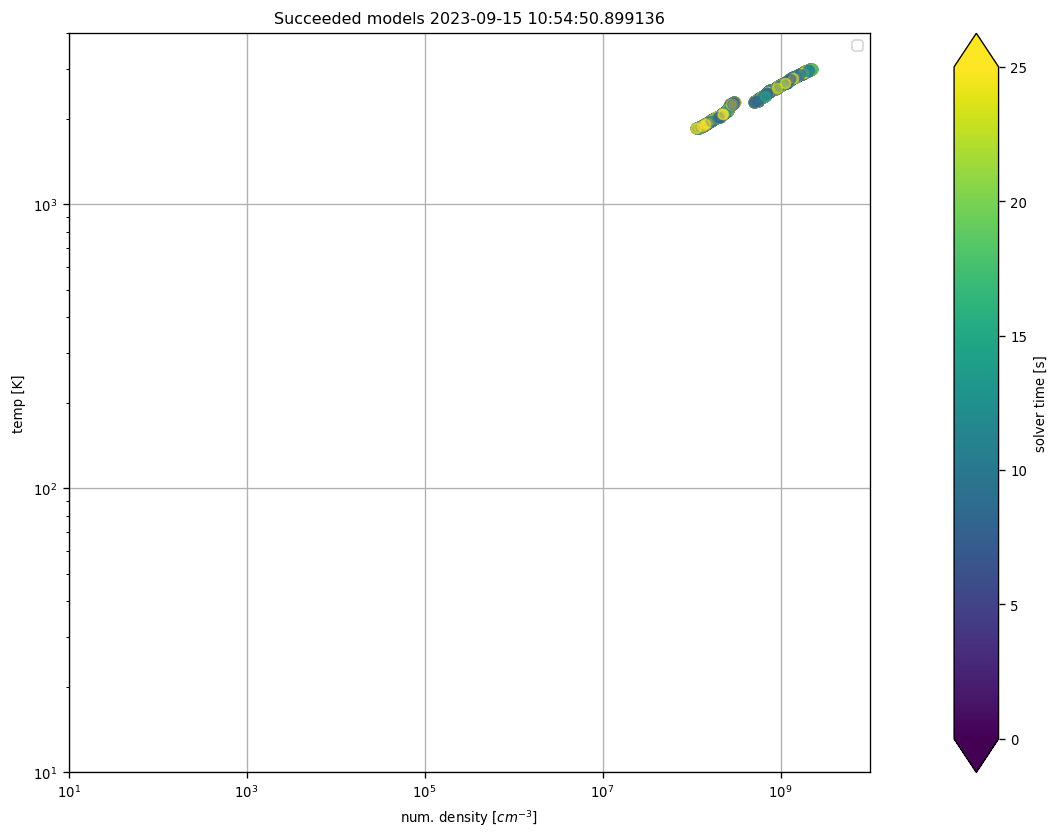

In [15]:
plot('easy-mace', dirs_em, step = 1)

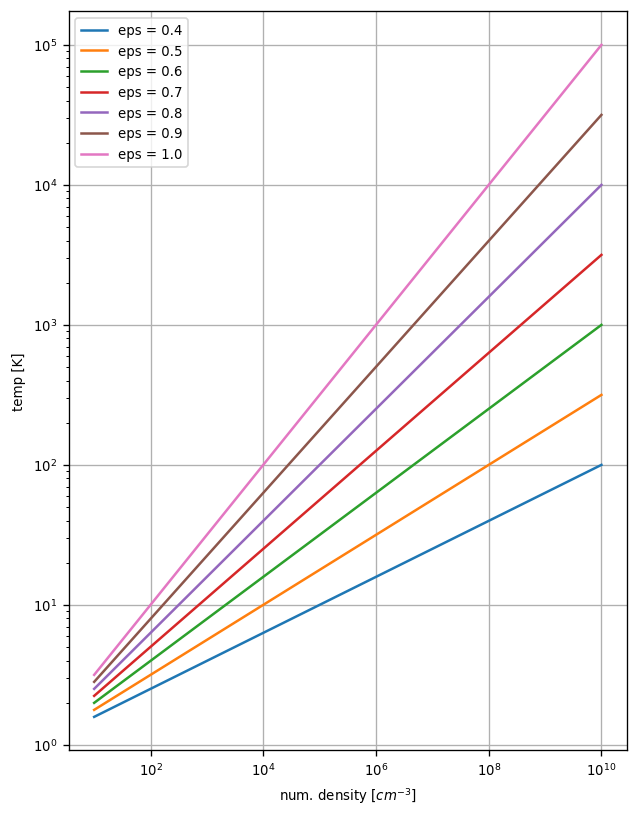

In [13]:

rho = np.linspace(1e1, 1e10, 100)
eps = np.linspace(0.4,1,7)


fig, ax = plt.subplots(1,1, figsize=(6, 8))
for i in range(len(eps)):
    T = temp(rho, eps[i])
    ax.plot(rho, T, label = 'eps = '+str(np.round(eps[i],1)))


ax.set_xscale('log')
ax.set_yscale('log')    
ax.grid(True)
ax.set_xlabel('num. density [$cm^{-3}$]')
ax.set_ylabel('temp [K]')
# ax.set_ylim([600,3e3])
plt.legend()

plt.show()


NameError: name 'fail' is not defined

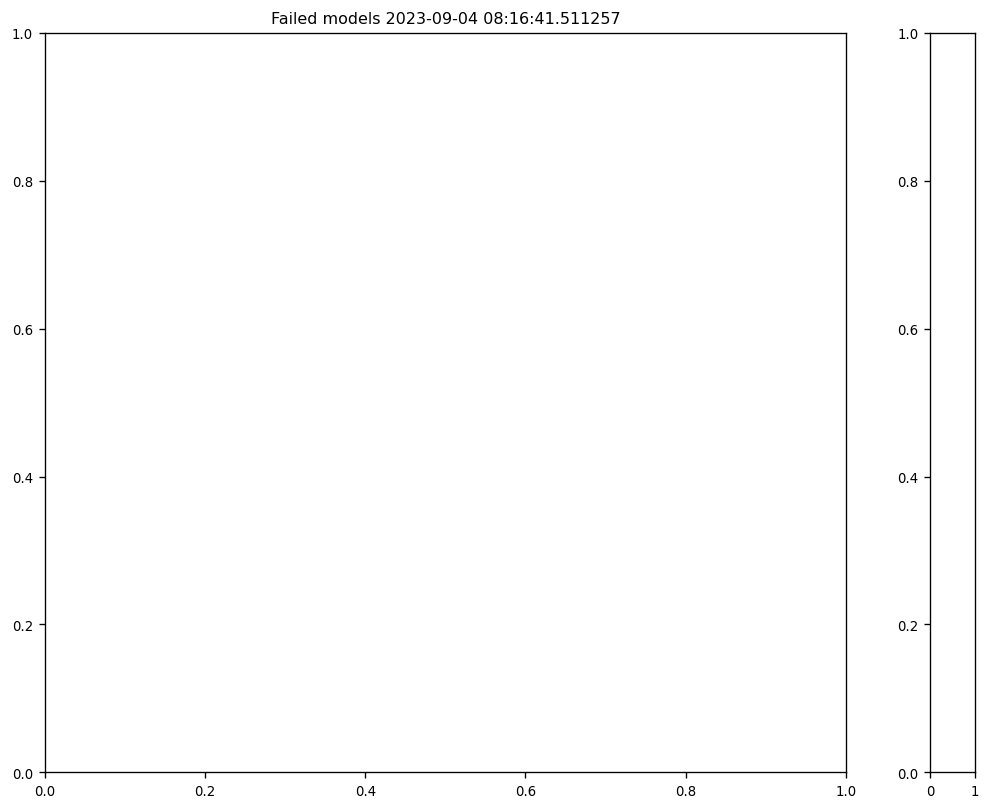

In [29]:
## plotting solve time via colormap

tmax = 100
time = np.linspace(0, 1, 128)
# print(time)
# colors = cm.viridis(time)

viridis_big = mpl.colormaps['viridis']
colors = (viridis_big(time))

# print(colors)
m_suc = 'o'

fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [18,1]},figsize=(10, 8))

ax[0].set_title('Failed models '+ str(name))

# for i in [16000,16020, 37920, 18479, 9843, 472, 5000, 6000]:
# for i in tqdm(range(5000,6000)):
for i in tqdm(range(len(fail))):
    input  = np.load(outpath+'fail/'+fail[i]+'/input.npy')
    tictoc = np.load(outpath+'fail/'+fail[i]+'/tictoc.npy')


    if i < 6150:
        c_suc = 'green'
    elif i >= 6150:
        c_suc = 'royalblue'

    target = tictoc[0]
    idx = np.argmin(np.abs(time*tmax  - target))
    c = colors[idx]

    # print(target, time[idx]*tmax, idx, c,np.log10(input[0]), np.log10(input[1]))

    ax[0].plot(input[0], input[1], color = c, marker = m_suc, alpha = alpha)

# print('\n', min(time*tmax),max(time*tmax))

vmin = 50
vmax = 100

## Colorbar
cmap = cm.viridis
norm =  mpl.colors.Normalize(vmin=min(time*tmax), vmax=max(time*tmax), clip = True)
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax[1], orientation='vertical', label = 'solver time [s]', extend = 'both')



ax[0].set_xscale('log')
ax[0].set_yscale('log')    
ax[0].grid(True)
ax[0].set_xlabel('num. density [$cm^{-3}$]')
ax[0].set_ylabel('temp [K]')

plt.show()

In [54]:
for c in colors:
    print(c)

[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.